# Week 8 Lab: Retail Sales Data Analysis using OOP and Pandas

### Description
You are working as a data analyst for a retail store. The store maintains sales data for its products, and
your task is to process, analyze, and generate reports using Object-Oriented Programming (OOP) and
Pandas.

## Part 0: Import modules/packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Data Handling with Pandas (Basic)
- Load the dataset into a Pandas DataFrame.

In [2]:
df = pd.read_csv("sales_data_india.csv")

- Display the first few rows of the dataset.

In [3]:
# print(df.head())
df.head()

,OrderID,Product,Category,Quantity,PricePerUnit,TotalPrice,Date,CustomerID,City
0,1001,Laptop,Electronics,1,60000,60000,2024-01-01,C001,Mumbai
1,1002,Smartphone,Electronics,2,20000,40000,2024-01-02,C002,Delhi
2,1003,Jeans,Clothing,3,1500,4500,2024-01-03,C003,Bengaluru
3,1004,LED TV,Electronics,1,45000,45000,2024-01-04,C004,Hyderabad
4,1005,Kurta,Clothing,4,800,3200,2024-01-05,C005,Chennai


- Handle missing values (if any) by filling or removing them.

In [4]:
missing_values = df.isnull().sum()
print("Missing values per column:", missing_values[missing_values > 0]) # Display columns with missing values (if any)

Missing values per column: Series([], dtype: int64)


## Part 2: Implementing OOP Concepts (Intermediate)
Create a Python class called `SalesDataProcessor` with the following:
- Attributes:
    - `df`: Stores the sales dataset as a Pandas DataFrame.
- Methods:
    - `load_data(file_path)`: Loads the dataset.
    - `clean_data()`: Handles missing values and converts data types.
    - `get_total_sales()`: Returns total sales (`sum of TotalPrice`).
    - `get_unique_products()`: Returns a list of unique products.
    - `get_sales_by_category()`: Returns total sales per product category.
    - `get_top_selling_product()`: Returns the product with the highest sales.


In [6]:
class SalesDataProcessor:
    def __init__(self, df=None):
        self.df = df

    def load_data(self, file_path):
        """Loads the dataset from a CSV file."""
        self.df = pd.read_csv(file_path)

    def clean_data(self):
        """Handles missing values and converts data types."""
        
        # Fill missing values with appropriate defaults
        self.df.fillna({'Product': 'Unknown', 'Category': 'Unknown', 'TotalPrice': 0}, inplace=True)
            
        # Convert columns to appropriate data types
        self.df['TotalPrice'] = pd.to_numeric(self.df['TotalPrice'], errors='coerce').fillna(0)
        self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce')

    def get_total_sales(self):
        """Returns total sales."""
        return self.df['TotalPrice'].sum()
    
    def get_unique_products(self):
        """Returns a list of unique products."""
        return self.df['Product'].unique().tolist()
    
    def get_sales_by_category(self):
        """Returns total sales per product category."""
        return self.df.groupby('Category')['TotalPrice'].sum().to_dict()
    
    def get_top_selling_product(self):
        """Returns the product with the highest sales."""
        return self.df.groupby('Product')['TotalPrice'].sum().idxmax()

In [7]:
sales = SalesDataProcessor() # Object creation

In [8]:
sales.load_data("sales_data_india.csv") # Loads the dataset.
sales.clean_data() # Handles missing values and converts data types.
print("Total sales: ", sales.get_total_sales()) # Returns total sales.
print("Unique products: ", sales.get_unique_products()) # Returns a list of unique products.
print("Sales by category: ", sales.get_sales_by_category()) # Returns total sales per product category.
print("Top selling product: ", sales.get_top_selling_product()) # Returns the product with the highest salsales

Total sales:  359100
Unique products:  ['Laptop', 'Smartphone', 'Jeans', 'LED TV', 'Kurta', 'Washing Machine', 'Mixer Grinder', 'Sports Shoes', 'Microwave', 'Earphones', 'Refrigerator', 'Sandals', 'Tablet', 'Hoodie', 'Air Fryer', 'Chappal', 'Smartwatch', 'Saree', 'Jacket', 'Toaster']
Sales by category:  {'Appliances': 114000, 'Clothing': 20700, 'Electronics': 213500, 'Footwear': 10900}
Top selling product:  Laptop


## Part 3: Extending OOP with Inheritance (Advanced)
Create a subclass called `CustomerSalesProcessor`, which extends `SalesDataProcessor` and adds:
- New Methods:
    - `get_total_sales_by_customer(customer_id)`: Returns total sales made by a specific customer.
    - `get_frequent_customers(n)`: Returns the top n customers who made the most purchases.
    - `get_sales_by_city()`: Returns total sales per city.

In [10]:
class CustomerSalesProcessor(SalesDataProcessor):
    def get_total_sales_by_customer(self, customer_id):
        """Returns total sales made by a specific customer."""
        return self.df[self.df['CustomerID'] == customer_id]['TotalPrice'].sum()
    
    def get_frequent_customers(self, n):
        """Returns the top n customers who made the most purchases."""
        return self.df['CustomerID'].value_counts().head(n).to_dict()
    
    def get_sales_by_city(self):
        """Returns total sales per city."""
        return self.df.groupby('City')['TotalPrice'].sum().to_dict()

In [11]:
customer = CustomerSalesProcessor() # Object creation

In [12]:
customer.load_data("sales_data_india.csv") # Loads the dataset.
print("Total sales by a customer of ID 'C001': ", customer.get_total_sales_by_customer("C001")) # Returns total sales made by a specific customer.
print("Top 5 customers who made the most purchases: ", customer.get_frequent_customers(5)) # Returns the top n customers who made the most purchases.
print("Total sales by city: ", customer.get_sales_by_city()) # Returns total sales per city.

Total sales by a customer of ID 'C001':  110000
Top 5 customers who made the most purchases:  {'C001': 2, 'C002': 2, 'C003': 2, 'C004': 2, 'C005': 2}
Total sales by city:  {'Ahmedabad': 8000, 'Bengaluru': 4500, 'Bhopal': 2000, 'Chennai': 3200, 'Delhi': 40000, 'Hyderabad': 45000, 'Indore': 50000, 'Jaipur': 10000, 'Kanpur': 7500, 'Kochi': 3500, 'Kolkata': 25000, 'Lucknow': 4500, 'Ludhiana': 500, 'Mumbai': 60000, 'Nagpur': 2400, 'Nashik': 4000, 'Patna': 14000, 'Pune': 6000, 'Surat': 55000, 'Vadodara': 14000}


## Part 4: Data Visualization (Bonus)
- Plot a **bar chart** showing total sales by category.

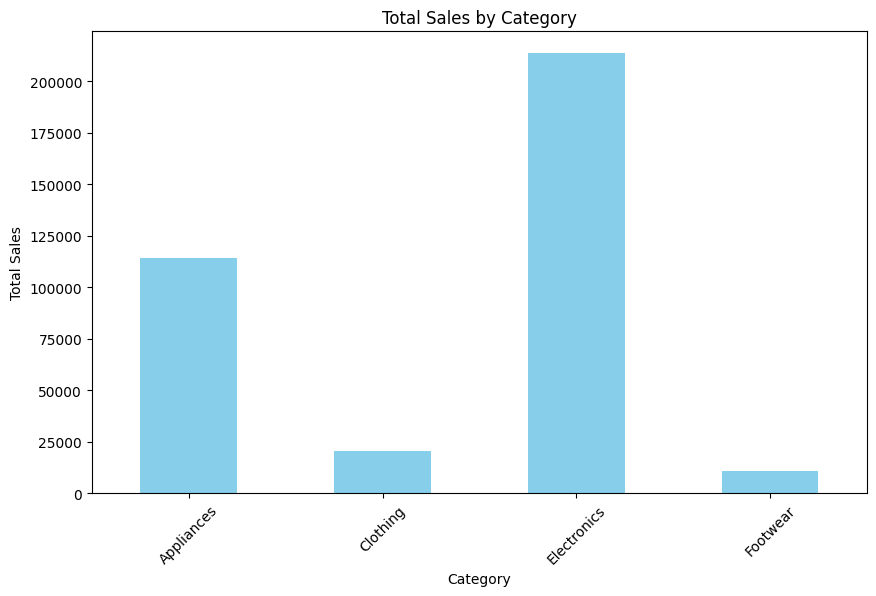

In [13]:
sales_by_category = df.groupby('Category')['TotalPrice'].sum()
sales_by_category.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- Plot a **line graph** of daily sales trends.

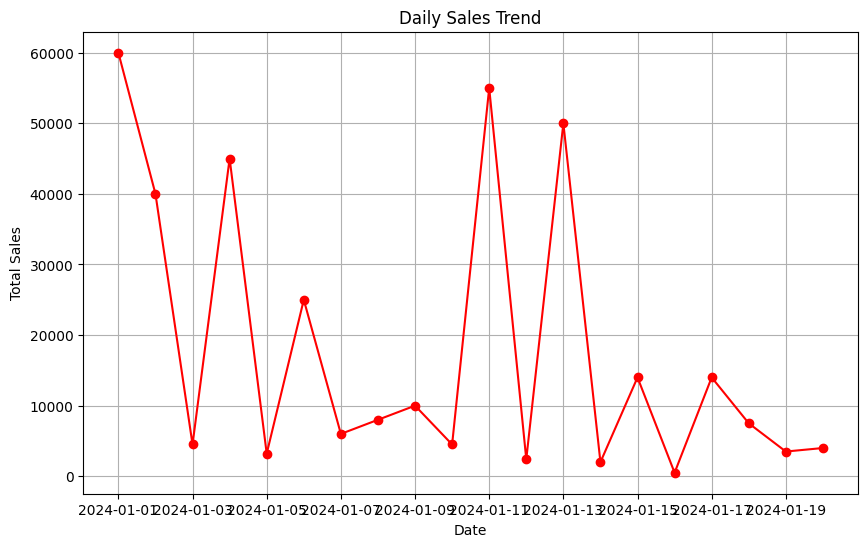

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # Ensure datetime format
daily_sales = df.groupby(df['Date'].dt.date)['TotalPrice'].sum()
daily_sales.plot(kind='line', figsize=(10, 6), marker='o', color='red')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

- Plot a **pie chart** showing the percentage contribution of different cities to total sales.

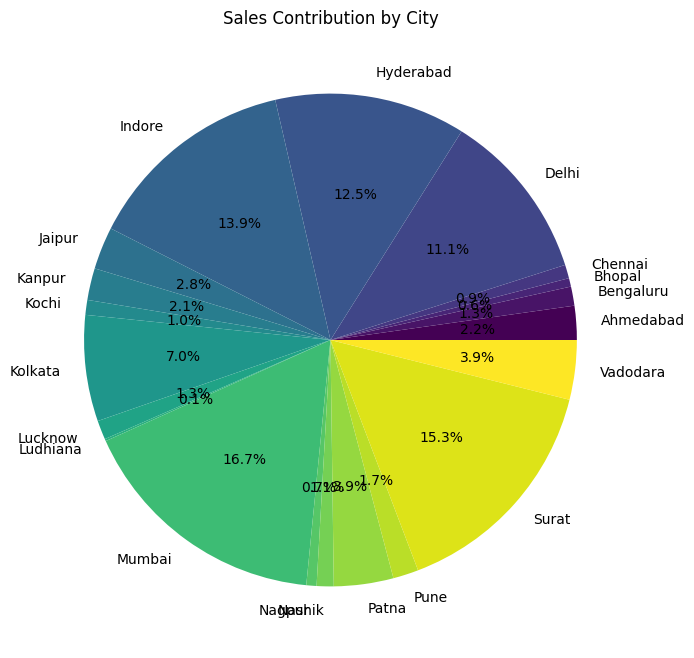

In [15]:
sales_by_city = df.groupby('City')['TotalPrice'].sum()
sales_by_city.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colormap='viridis')
plt.title('Sales Contribution by City')
plt.ylabel('')
plt.show()